In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import datasets
from io import StringIO
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 550)
pd.set_option('display.max_colwidth', 500)


In [80]:
#extract the data
bank=pd.read_csv('bank.csv')
bank #you can either drop dependent variable now ad do label encoding or can convert using one not and then drop it out later (as done in step by step tutorial)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [81]:
# Check if the data set contains any null values - Nothing found!
bank[bank.isnull().any(axis=1)].count()   #another method to findnull values

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [82]:
bank.describe()  #.describe()  to get statistical information.   no null value , so count is same

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


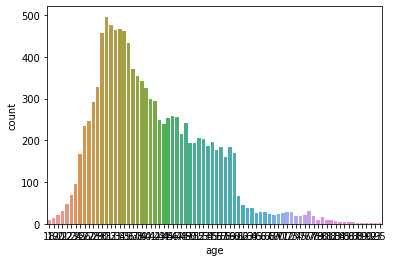

In [83]:
sns.countplot(x=bank["age"])    #.countplot() to check distribution

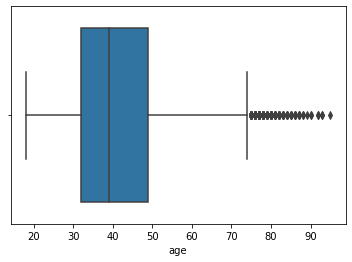

In [84]:
# Boxplot for 'age'
g = sns.boxplot(x=bank["age"])     # consider data of age from 18-75..minimum age =18,max=95(outliered which should not be aken coz minor concentration) ,more age cncentrated in 30-50

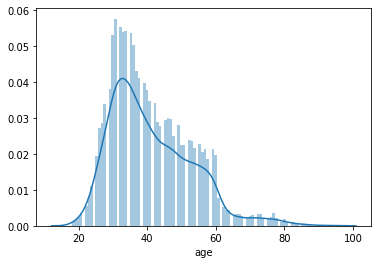

In [85]:
# Distribution of Age
sns.distplot(bank.age, bins=100)     #obtained distribution should be ND.it is close to ND. 

In [86]:
pd.DataFrame({'count':bank.groupby(['age']).size()}).reset_index()  #has counted how many ages are present.18 repeated 8 times

,age,count
0,18,8
1,19,13
2,20,20
3,21,30
4,22,48
5,23,68
6,24,95
7,25,168
8,26,235
9,27,246


In [87]:
bank.groupby('age').count()         #optional

,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
age,,,,,,,,,,,,,,,,
18,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
19,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13
20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20
21,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30
22,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48
23,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68
24,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95
25,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168
26,235,235,235,235,235,235,235,235,235,235,235,235,235,235,235,235


In [88]:
bank[bank['age']==26].count()

age          235
job          235
marital      235
education    235
default      235
balance      235
housing      235
loan         235
contact      235
day          235
month        235
duration     235
campaign     235
pdays        235
previous     235
poutcome     235
deposit      235
dtype: int64

In [89]:
#you can construct boxplot,distplot any column

In [90]:
# Make a copy for parsing   #to convert categorical to numerical
bank_data = bank.copy()
bank_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [91]:
bank['job'].value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

In [92]:
# Explore People who made a deposit Vs Job category chekicn how many said yes' to term depsoit
jobs = ['management','blue-collar','technician','admin.','services','retired','self-employed','student',\
        'unemployed','entrepreneur','housemaid','unknown']

for j in jobs:
    print("{:15} : {:5}". format(j, len(bank_data[(bank_data.deposit == "yes") & (bank_data.job ==j)])))  #15:5 means space of 15 and 5 distance from j and colon

management      :  1301
blue-collar     :   708
technician      :   840
admin.          :   631
services        :   369
retired         :   516
self-employed   :   187
student         :   269
unemployed      :   202
entrepreneur    :   123
housemaid       :   109
unknown         :    34


In [93]:
# Explore People who made a deposit Vs Job category chekicn how many said no' to term depsoit
jobs = ['management','blue-collar','technician','admin.','services','retired','self-employed','student',\
        'unemployed','entrepreneur','housemaid','unknown']

for j in jobs:   #format(,len data[(data['deposit']=='no') & (data['job']==j)] is the format
    print("{:15} : {:5}". format(j, len(bank_data[(bank_data.deposit == "no") & (bank_data.job ==j)])))  #15:5 means space of 15 and 5 distance from j and colon

management      :  1265
blue-collar     :  1236
technician      :   983
admin.          :   703
services        :   554
retired         :   262
self-employed   :   218
student         :    91
unemployed      :   155
entrepreneur    :   205
housemaid       :   165
unknown         :    36


In [94]:
# Combine similar jobs into categiroes
bank_data['job'] = bank_data['job'].replace(['management', 'admin.'], 'white-collar')
bank_data['job'] = bank_data['job'].replace(['services','housemaid'], 'pink-collar')
bank_data['job'] = bank_data['job'].replace(['retired', 'student', 'unemployed', 'unknown'], 'other')

In [95]:
bank_data.job.value_counts()

white-collar     3900
blue-collar      1944
technician       1823
other            1565
pink-collar      1197
self-employed     405
entrepreneur      328
Name: job, dtype: int64

In [96]:
bank_data.poutcome.value_counts()

unknown    8326
failure    1228
success    1071
other       537
Name: poutcome, dtype: int64

In [97]:
# Combine 'unknown' and 'other' as 'other' isn't really match with either 'success' or 'failure'
bank_data['poutcome'] = bank_data['poutcome'].replace(['other'] , 'unknown')
bank_data.poutcome.value_counts()

unknown    8863
failure    1228
success    1071
Name: poutcome, dtype: int64

In [98]:
# Drop 'contact', as every participant has been contacted. 
bank_data.drop('contact', axis=1, inplace=True)

In [99]:
bank['contact'].value_counts()

cellular     8042
unknown      2346
telephone     774
Name: contact, dtype: int64

In [100]:
bank['job'].value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

In [101]:
#assign dependent column to new variable and drop it from copied data
label=bank_data['deposit']
bank_data=bank_data.drop(['deposit'],axis=1)


In [102]:
#do label encoding for no=0 , yes=1
cleanup = {'contact': {'no':0 , 'yes':1},
           'default': {'no':0 , 'yes':1},
           'housing' : {'no':0 , 'yes':1}, 
           'loan' : {'no':0 , 'yes':1},
          'deposit' : {'no':0 , 'yes':1}}

In [103]:
#.replace() to replace categorical to numerical encoded outputs
bank_data.replace(cleanup,inplace=True)

In [104]:
bank_data

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome
0,59,white-collar,married,secondary,0,2343,1,0,5,may,1042,1,-1,0,unknown
1,56,white-collar,married,secondary,0,45,0,0,5,may,1467,1,-1,0,unknown
2,41,technician,married,secondary,0,1270,1,0,5,may,1389,1,-1,0,unknown
3,55,pink-collar,married,secondary,0,2476,1,0,5,may,579,1,-1,0,unknown
4,54,white-collar,married,tertiary,0,184,0,0,5,may,673,2,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,0,1,1,0,20,apr,257,1,-1,0,unknown
11158,39,pink-collar,married,secondary,0,733,0,0,16,jun,83,4,-1,0,unknown
11159,32,technician,single,secondary,0,29,0,0,19,aug,156,2,-1,0,unknown
11160,43,technician,married,secondary,0,0,0,1,8,may,9,2,172,5,failure


In [105]:
bank_data=bank_data.drop(['month'],axis=1)  #dropped 'month' because it is not been impacting the dependent variable.

In [106]:
# Convert categorical variables to dummies using pd.get_dummies()
bank_with_dummies = pd.get_dummies(data=bank_data, columns = ['job', 'marital','education' ,'poutcome'], \
                                   prefix = ['job', 'marital', 'education' , 'poutcome'])
bank_with_dummies.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_other,job_pink-collar,job_self-employed,job_technician,job_white-collar,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_success,poutcome_unknown
0,59,0,2343,1,0,5,1042,1,-1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1
1,56,0,45,0,0,5,1467,1,-1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1
2,41,0,1270,1,0,5,1389,1,-1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1
3,55,0,2476,1,0,5,579,1,-1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1
4,54,0,184,0,0,5,673,2,-1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1


In [107]:
bank_with_dummies.shape   #.shape() to obtain rows,columns information

(11162, 27)

In [108]:
bank_with_dummies.describe()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_other,job_pink-collar,job_self-employed,job_technician,job_white-collar,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_success,poutcome_unknown
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,0.015051,1528.538524,0.473123,0.130801,15.658036,371.993818,2.508421,51.330407,0.832557,0.174162,0.029385,0.140208,0.107239,0.036284,0.163322,0.349400,0.115839,0.568984,0.315176,0.134385,0.490593,0.330496,0.044526,0.110016,0.095951,0.794033
std,11.913369,0.121761,3225.413326,0.499299,0.337198,8.420740,347.128386,2.722077,108.758282,2.292007,0.379266,0.168892,0.347218,0.309431,0.187004,0.369676,0.476802,0.320047,0.495241,0.464607,0.341080,0.499934,0.470413,0.206270,0.312924,0.294537,0.404424
min,18.000000,0.000000,-6847.000000,0.000000,0.000000,1.000000,2.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,0.000000,122.000000,0.000000,0.000000,8.000000,138.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,39.000000,0.000000,550.000000,0.000000,0.000000,15.000000,255.000000,2.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,49.000000,0.000000,1708.000000,1.000000,0.000000,22.000000,496.000000,3.000000,20.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,95.000000,1.000000,81204.000000,1.000000,1.000000,31.000000,3881.000000,63.000000,854.000000,58.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


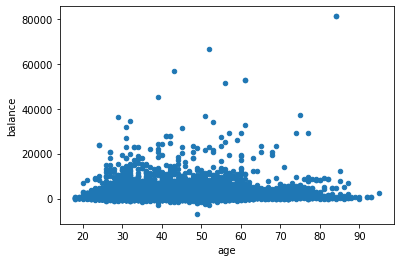

In [109]:
# Scatterplot showing age and balance
bank_with_dummies.plot(kind='scatter', x='age', y='balance')

# Across all ages, majority of people have savings of less than 20000.

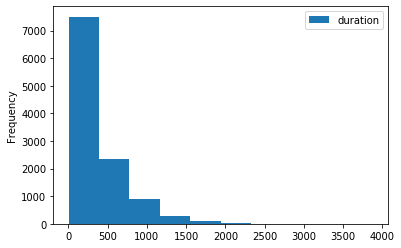

In [110]:
bank_with_dummies.plot(kind='hist', x='poutcome_success', y='duration')

In [112]:
# People signed up to a term deposite having a personal loan (loan_cat) and housing loan (housing_cat)
length=len(bank_with_dummies[(bank_with_dummies.loan==1) & (bank_with_dummies.housing==1)])
length

835

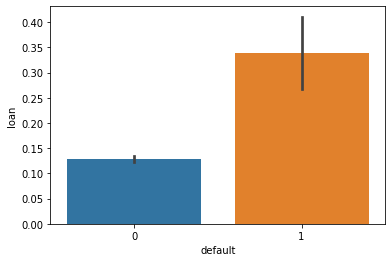

In [115]:
# Bar chart of job Vs deposite
sns.barplot(x='default', y = 'loan',data = bank_data)

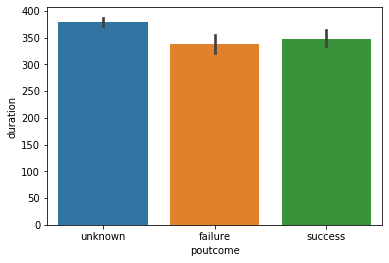

In [116]:
sns.barplot(x='poutcome', y = 'duration', data = bank_data)

In [117]:
#CLASSIFICATION

In [118]:
# make a copy
bankcl = bank_with_dummies

In [119]:
# The Correltion matrix
corr = bankcl.corr()
corr

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_other,job_pink-collar,job_self-employed,job_technician,job_white-collar,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_success,poutcome_unknown
age,1.000000,-0.011425,0.112300,-0.168700,-0.031418,-0.000762,0.000189,-0.005278,0.002774,0.020169,-0.066567,0.024176,0.296418,-0.027942,-0.023163,-0.082716,-0.080122,0.186349,0.318436,-0.467799,0.231150,-0.094400,-0.101372,0.077761,-0.008071,0.062114,-0.038992
default,-0.011425,1.000000,-0.060954,0.011076,0.076434,0.017342,-0.009760,0.030975,-0.036282,-0.035273,0.022779,0.022060,-0.018130,-0.007173,0.007493,0.003109,-0.013425,0.019633,-0.006819,-0.006255,0.013858,-0.000618,-0.011768,0.005421,-0.024650,-0.040272,0.048403
balance,0.112300,-0.060954,1.000000,-0.077092,-0.084589,0.010467,0.022436,-0.013894,0.017411,0.030805,-0.046220,0.005039,0.050744,-0.041063,0.020264,0.003802,0.013780,-0.017586,0.025431,-0.014994,-0.000673,-0.070609,0.069128,0.014596,0.001695,0.045603,-0.034524
housing,-0.168700,0.011076,-0.077092,1.000000,0.076761,-0.014770,0.035051,0.006660,0.064497,-0.000840,0.189848,0.011492,-0.233309,0.043884,-0.016903,0.006551,-0.012111,0.007430,0.036305,-0.043817,0.017002,0.118514,-0.114955,-0.053191,0.087741,-0.136299,0.031375
loan,-0.031418,0.076434,-0.084589,0.076761,1.000000,0.017269,-0.001914,0.034722,-0.030416,-0.022668,0.057956,0.042631,-0.096196,0.014969,0.004299,0.006864,-0.007871,0.026463,0.044148,-0.065288,0.006854,0.079583,-0.067513,-0.050249,0.006264,-0.080370,0.053686
day,-0.000762,0.017342,0.010467,-0.014770,0.017269,1.000000,-0.018511,0.137007,-0.077232,-0.058981,-0.023039,-0.004463,-0.010414,0.008883,0.006458,0.027038,-0.001771,0.001368,0.002832,-0.003961,-0.006896,-0.010395,0.010393,0.012894,-0.068381,-0.044280,0.085159
duration,0.000189,-0.009760,0.022436,0.035051,-0.001914,-0.018511,1.000000,-0.041557,-0.027392,-0.026716,0.029986,-0.000908,0.010680,0.005345,0.013506,-0.010440,-0.031980,0.021364,-0.036179,0.023847,0.013405,0.003820,-0.006813,-0.015887,-0.033966,-0.022578,0.042725
campaign,-0.005278,0.030975,-0.013894,0.006660,0.034722,0.137007,-0.041557,1.000000,-0.102726,-0.049699,0.005522,0.013883,-0.050212,0.011958,0.001776,0.021738,0.001944,-0.006828,0.047722,-0.046165,0.019915,-0.013834,-0.005427,0.012976,-0.080188,-0.091807,0.128907
pdays,0.002774,-0.036282,0.017411,0.064497,-0.030416,-0.077232,-0.027392,-0.102726,1.000000,0.507272,-0.030695,-0.029732,0.022585,-0.012448,-0.011224,-0.016588,0.043842,-0.015574,-0.019280,0.031280,-0.041135,0.017792,0.011566,-0.001479,0.602615,0.329567,-0.706294
previous,0.020169,-0.035273,0.030805,-0.000840,-0.022668,-0.058981,-0.026716,-0.049699,0.507272,1.000000,-0.039939,-0.022470,0.031191,-0.028623,-0.002338,0.002035,0.034929,-0.026566,-0.005176,0.023817,-0.024852,-0.004620,0.028146,-0.011898,0.335870,0.325477,-0.496921


<Figure size 7200x7200 with 0 Axes>

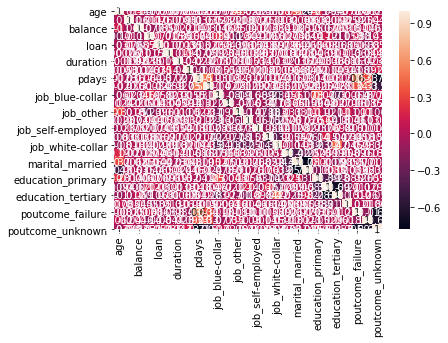

<Figure size 7200x7200 with 0 Axes>

In [120]:
sns.heatmap(data=corr,annot=True)  #.heatmap() 
plt.figure(figsize = (100,100))


In [ ]:
#build the model

In [122]:
# Train-Test split: 20% test data
data_drop_deposite = bankcl
data_train, data_test, label_train, label_test = train_test_split(data_drop_deposite, label, test_size = 0.2, random_state = 50)

In [123]:
# Decision tree with depth = 2
dt2 = tree.DecisionTreeClassifier(random_state=1, max_depth=2)
dt2.fit(data_train, label_train)
dt2_score_train = dt2.score(data_train, label_train)
print("Training score: ",dt2_score_train)
dt2_score_test = dt2.score(data_test, label_test)
print("Testing score: ",dt2_score_test)

Training score:  0.7285250307985217
Testing score:  0.7268248992386923


In [124]:
# Decision tree with depth = 3
dt3 = tree.DecisionTreeClassifier(random_state=1, max_depth=3)
dt3.fit(data_train, label_train)
dt3_score_train = dt3.score(data_train, label_train)
print("Training score: ",dt3_score_train)
dt3_score_test = dt3.score(data_test, label_test)
print("Testing score: ",dt3_score_test)

Training score:  0.7764587299809609
Testing score:  0.7666815942678011


In [125]:
# Decision tree with depth = 4
dt4 = tree.DecisionTreeClassifier(random_state=1, max_depth=4)
dt4.fit(data_train, label_train)
dt4_score_train = dt4.score(data_train, label_train)
print("Training score: ",dt4_score_train)
dt4_score_test = dt4.score(data_test, label_test)
print("Testing score: ",dt4_score_test)

Training score:  0.7867622354127002
Testing score:  0.7733990147783252


In [126]:
# Decision tree with depth = 6                                      #happens 6 times splittings
dt6 = tree.DecisionTreeClassifier(random_state=1, max_depth=6)
dt6.fit(data_train, label_train)
dt6_score_train = dt6.score(data_train, label_train)
print("Training score: ",dt6_score_train)
dt6_score_test = dt6.score(data_test, label_test)
print("Testing score: ",dt6_score_test)

Training score:  0.8049053645425019
Testing score:  0.7787729511867443


In [127]:
# Decision tree: To the full depth      #
dt1 = tree.DecisionTreeClassifier()
dt1.fit(data_train, label_train)
dt1_score_train = dt1.score(data_train, label_train)
print("Training score: ", dt1_score_train)
dt1_score_test = dt1.score(data_test, label_test)
print("Testing score: ", dt1_score_test)

Training score:  1.0
Testing score:  0.7268248992386923


In [128]:
print('{:10} {:20} {:20}'.format('depth', 'Training score','Testing score'))  #for better presenttaion
print('{:10} {:20} {:20}'.format('-----', '--------------','-------------'))
print('{:1} {:>25} {:>20}'.format(2, dt2_score_train, dt2_score_test))  #TRAIN AND TEST SCORE SHOULD BE HIGH AND MATCH
print('{:1} {:>25} {:>20}'.format(3, dt3_score_train, dt3_score_test))
print('{:1} {:>25} {:>20}'.format(4, dt4_score_train, dt4_score_test))
print('{:1} {:>25} {:>20}'.format(6, dt6_score_train, dt6_score_test))
print('{:1} {:>23} {:>20}'.format("max", dt1_score_train, dt1_score_test))

depth      Training score       Testing score       
-----      --------------       -------------       
2        0.7285250307985217   0.7268248992386923
3        0.7764587299809609   0.7666815942678011
4        0.7867622354127002   0.7733990147783252
6        0.8049053645425019   0.7787729511867443
max                     1.0   0.7268248992386923


In [129]:
# Let's generate the decision tree for depth = 2
# Create a feature vector
features = bankcl.columns.tolist()

# Uncomment below to generate the digraph Tree.
#tree.export_graphviz(dt2, out_file='tree_depth_2.dot', feature_names=features)

In [130]:
dt2.predict_proba(data_test)

array([[0.19295499, 0.80704501],
       [0.83668639, 0.16331361],
       [0.48515568, 0.51484432],
       ...,
       [0.83668639, 0.16331361],
       [0.48515568, 0.51484432],
       [0.83668639, 0.16331361]])

In [131]:
# Two classes: 0 = not signed up,  1 = signed up
dt2.classes_

array(['no', 'yes'], dtype=object)

In [132]:
# Create a feature vector
features = data_drop_deposite.columns.tolist()

features

['age',
 'default',
 'balance',
 'housing',
 'loan',
 'day',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'job_blue-collar',
 'job_entrepreneur',
 'job_other',
 'job_pink-collar',
 'job_self-employed',
 'job_technician',
 'job_white-collar',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'education_primary',
 'education_secondary',
 'education_tertiary',
 'education_unknown',
 'poutcome_failure',
 'poutcome_success',
 'poutcome_unknown']

In [133]:
# Investigate most important features with depth =2                    #data_train(x_train) ,data_test(x_test)

dt2 = tree.DecisionTreeClassifier(random_state=1, max_depth=2)          #label_train(y_train) ,label_test(y_test)

# Fit the decision tree classifier
dt2.fit(data_train, label_train)

fi = dt2.feature_importances_                 #dt2 is model name
                                              #to check feature importances
l = len(features)
for i in range(0,len(features)):
    print('{:.<20} {:3}'.format(features[i],fi[i]))    #poutcome and duraton has shown values

age................. 0.0
default............. 0.0
balance............. 0.0
housing............. 0.0
loan................ 0.0
day................. 0.0
duration............ 0.849306123902405
campaign............ 0.0
pdays............... 0.0
previous............ 0.0
job_blue-collar..... 0.0
job_entrepreneur.... 0.0
job_other........... 0.0
job_pink-collar..... 0.0
job_self-employed... 0.0
job_technician...... 0.0
job_white-collar.... 0.0
marital_divorced.... 0.0
marital_married..... 0.0
marital_single...... 0.0
education_primary... 0.0
education_secondary. 0.0
education_tertiary.. 0.0
education_unknown... 0.0
poutcome_failure.... 0.0
poutcome_success.... 0.15069387609759496
poutcome_unknown.... 0.0


In [134]:
# According to feature importance results, most importtant feature is the "Duration"
# Let's calculte statistics on Duration
print("Mean duration   : ", data_drop_deposite.duration.mean())
print("Maximun duration: ", data_drop_deposite.duration.max())       #our root node will be duration now
print("Minimum duration: ", data_drop_deposite.duration.min())

Mean duration   :  371.99381831213043
Maximun duration:  3881
Minimum duration:  2


In [136]:
# Make predictions on the test set
preds = dt2.predict(data_test)

# Calculate accuracy
print("\nAccuracy score: \n{}".format(metrics.accuracy_score(label_test, preds)))

# Make predictions on the test set using predict_proba
probs = dt2.predict_proba(data_test)[:,1]

# Calculate the AUC metric
print("\nArea Under Curve: \n{}".format(metrics.roc_auc_score(label_test, probs)))


Accuracy score: 
0.7268248992386923

Area Under Curve: 
0.7880265888143609
